<h3> Running the "keras_qlayer" jupyter notebook to obtain the Keras quantum layer </h3>

In [1]:
%run generalized_keras_qlayer.ipynb

Enter number of qubits (default=4): 
0: ──RX(0.00)─╭●──RY(0.25)─────────────────────┤  <Z>
1: ──RX(0.10)─╰X─╭●─────────RY(0.33)───────────┤  <Z>
2: ──RX(1.50)────╰X────────╭●─────────RY(0.75)─┤  <Z>
3: ──RX(0.33)──────────────╰X─────────RY(0.67)─┤  <Z>
tf.Tensor([0.98  0.93  0.052 0.048], shape=(4,), dtype=float64)


<h3> Importing necessary libraries </h3>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

<h3> Instantiating and visualizing the Moons dataset from Scikit-Learn </h3>

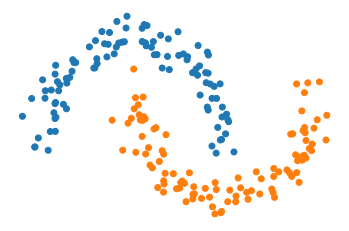

In [3]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_moons(n_samples=200, noise=0.1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

<h3> Creating model with classical and quantum layers </h3> 

In [4]:
tf.keras.backend.set_floatx('float64')

clayer_1 = tf.keras.layers.Dense(2)
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")
model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_2])

In [8]:
model_details = model.get_config()
print(f"Model name: {model_details['name']}")
print("Model layers:")
for i in range(len(model_details['layers'])):
    print('  -', model_details['layers'][i]['class_name'])

Model name: sequential
Model layers:
  - Dense
  - KerasLayer
  - Dense


<h3> 1st model </h3>

In [9]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

In [10]:
# qlayer.get_weights()

In [11]:
model1_history = model.fit(X, y_hot, epochs=5, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/5
30/30 [==============================] - 5s 173ms/step - loss: 0.4359 - accuracy: 0.6467 - val_loss: 0.3878 - val_accuracy: 0.7000
Epoch 2/5
30/30 [==============================] - 5s 172ms/step - loss: 0.2962 - accuracy: 0.8200 - val_loss: 0.2839 - val_accuracy: 0.8200
Epoch 3/5
30/30 [==============================] - 5s 171ms/step - loss: 0.2205 - accuracy: 0.8600 - val_loss: 0.2480 - val_accuracy: 0.8200
Epoch 4/5
30/30 [==============================] - 5s 171ms/step - loss: 0.1902 - accuracy: 0.8733 - val_loss: 0.2097 - val_accuracy: 0.8200
Epoch 5/5
30/30 [==============================] - 5s 172ms/step - loss: 0.1685 - accuracy: 0.8533 - val_loss: 0.1869 - val_accuracy: 0.8200


In [12]:
# Verification that the weights of the qlayer update after training
# qlayer.get_weights()

<h3> 2nd model for potentially better performance </h3>

In [13]:
# re-define the layers
clayer_1 = tf.keras.layers.Dense(4)
qlayer_1 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=num_of_qubits)
qlayer_2 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=num_of_qubits)
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")

# construct the model
inputs = tf.keras.Input(shape=(2,))
x = clayer_1(inputs)
x_1, x_2 = tf.split(x, 2, axis=1)
x_1 = qlayer_1(x_1)
x_2 = qlayer_2(x_2)
x = tf.concat([x_1, x_2], axis=1)
outputs = clayer_2(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [14]:
#print(qlayer_1.get_weights())
#print(qlayer_2.get_weights())

In [15]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

model2_history = model.fit(X, y_hot, epochs=6, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/6
30/30 [==============================] - 10s 337ms/step - loss: 0.4519 - accuracy: 0.5667 - val_loss: 0.3463 - val_accuracy: 0.7400
Epoch 2/6
30/30 [==============================] - 10s 338ms/step - loss: 0.3116 - accuracy: 0.7067 - val_loss: 0.2471 - val_accuracy: 0.7800
Epoch 3/6
30/30 [==============================] - 10s 339ms/step - loss: 0.2387 - accuracy: 0.8000 - val_loss: 0.2146 - val_accuracy: 0.7800
Epoch 4/6
30/30 [==============================] - 10s 335ms/step - loss: 0.2104 - accuracy: 0.7933 - val_loss: 0.1867 - val_accuracy: 0.8400
Epoch 5/6
30/30 [==============================] - 10s 337ms/step - loss: 0.1915 - accuracy: 0.8200 - val_loss: 0.1727 - val_accuracy: 0.8400
Epoch 6/6
30/30 [==============================] - 10s 338ms/step - loss: 0.1828 - accuracy: 0.8200 - val_loss: 0.1664 - val_accuracy: 0.8400


In [16]:
#print(qlayer_1.get_weights())
#print(qlayer_2.get_weights())

<h3> 3rd model for potentially better performance </h3>

In [17]:
# re-define the layers
clayer_1 = tf.keras.layers.Dense(4)
clayer_2 = tf.keras.layers.Dense(8)
clayer_3 = tf.keras.layers.Dense(4)
qlayer_1 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=num_of_qubits)
qlayer_2 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=num_of_qubits)
clayer_4 = tf.keras.layers.Dense(2, activation="softmax")

# construct the model
inputs = tf.keras.Input(shape=(2,))
x = clayer_3(clayer_2(clayer_1(inputs)))
q_1, q_2 = tf.split(x, 2, axis=1)
q_1 = qlayer_1(q_1)
q_2 = qlayer_2(q_2)
x = tf.concat([q_1, q_2], axis=1)
outputs = clayer_4(x)

model3 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [18]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model3.compile(opt, loss="mae", metrics=["accuracy"])

model3_history = model3.fit(X, y_hot, epochs=10, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/10
30/30 [==============================] - 10s 337ms/step - loss: 0.4328 - accuracy: 0.6867 - val_loss: 0.3356 - val_accuracy: 0.8000
Epoch 2/10
30/30 [==============================] - 10s 340ms/step - loss: 0.2776 - accuracy: 0.8067 - val_loss: 0.2126 - val_accuracy: 0.8400
Epoch 3/10
30/30 [==============================] - 10s 340ms/step - loss: 0.1906 - accuracy: 0.8400 - val_loss: 0.1864 - val_accuracy: 0.8200
Epoch 4/10
30/30 [==============================] - 10s 335ms/step - loss: 0.1679 - accuracy: 0.8533 - val_loss: 0.1741 - val_accuracy: 0.8400
Epoch 5/10
30/30 [==============================] - 10s 338ms/step - loss: 0.1566 - accuracy: 0.8733 - val_loss: 0.1739 - val_accuracy: 0.8200
Epoch 6/10
30/30 [==============================] - 10s 338ms/step - loss: 0.1419 - accuracy: 0.8733 - val_loss: 0.1890 - val_accuracy: 0.8400
Epoch 7/10
30/30 [==============================] - 10s 336ms/step - loss: 0.1584 - accuracy: 0.8467 - val_loss: 0.1765 - val_accuracy: 0.8400

<h3> Result Plots </h3>

In [19]:
# summarize history for accuracy
def plot_history(history, mode, model_number):
    if mode == "ACC":
        mode = 'accuracy'
    elif mode == "LOSS":
        mode = 'loss'
    else:
        print("ERROR")
        
    plt.plot(history.history[f"{mode}"])
    plt.plot(history.history[f"val_{mode}"])
    plt.title(f"model{model_number} {mode}")
    plt.ylabel(f'{mode}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

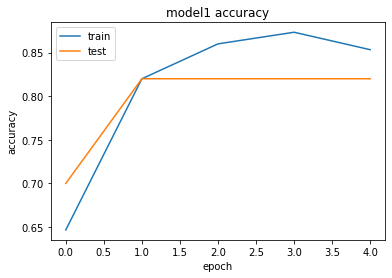

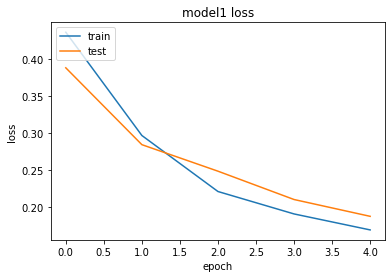

In [20]:
plot_history(model1_history, "ACC", 1)
plot_history(model1_history, "LOSS", 1)

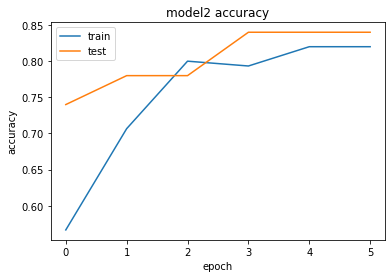

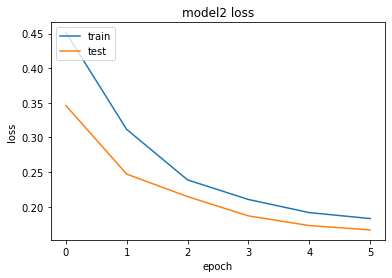

In [21]:
plot_history(model2_history, "ACC", 2)
plot_history(model2_history, "LOSS", 2)

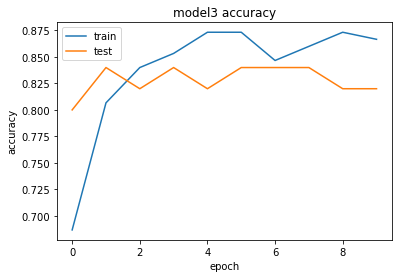

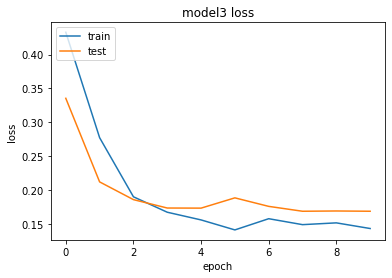

In [22]:
plot_history(model3_history, "ACC", 3)
plot_history(model3_history, "LOSS", 3)